# Describtion

Given a list of short text responses and a list of possible key phrases or group of key phrases with similar meaning. Assign key phrases or the group to relevant short text response. A key phrase can be assigned to multiple responses and similarly a response can be assigned multiple key phrases.



# Problem Statemtent

Find Similer keyphase in a corpus

# Constraints:
Has to understand the semantic relation between words and given keyphrase
No Latency Requirement

# Benefits:
Help to understand and transverse huge corpus



## Importing Liabraries

In [1]:
import numpy as np
import pandas as pd



## Loading dataset

In [2]:
fake_test = pd.read_csv('Fake.csv')    #reading fake csv
fake_test['label'] = 0 #Adding label: 0  to fake news
fake_test = fake_test[['text', 'label']]

In [3]:
true_test = pd.read_csv('True.csv')     #reading True.csv
true_test['label'] = 1 #Adding label: 1  to real news
true_test = true_test[['text', 'label']]

In [4]:
data = pd.concat([true_test, fake_test])       
data = data.sample(frac = 1)              # combining Fake and True in data

In [5]:
data # Final Dataset

,text,label
23292,Jay Dyer 21st Century WireThe last Star Trek r...,0
7030,WASHINGTON (Reuters) - A Republican antitrust ...,1
16834,KABUL (Reuters) - A suicide attacker rammed a ...,1
16940,The Democrats tried to attach a gun control am...,0
19405,Walmart has pulled all its Bulletproof: Black...,0
3239,WASHINGTON (Reuters) - The U.S. federal govern...,1
10880,CLEVELAND (Reuters) - Ohio state legislators o...,1
12272,"CALGARY, Alberta (Reuters) - The Conservative ...",1
19291,MEXICO CITY (Reuters) - When Tuesday s earthqu...,1
8306,(Reuters) - A life-sized nude statue of U.S. R...,1


## Performing simple EDA

In [6]:
data.columns #Checking columns

Index(['text', 'label'], dtype='object')

In [7]:
data.isnull().sum() #Checking for null values

text     0
label    0
dtype: int64

In [8]:
data.isna().sum() #Checking for Nan values

text     0
label    0
dtype: int64

# Text Preproccesing

In [9]:
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup

In [10]:
# DECONTRACTING 
# eg:  can't = can not
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [11]:
# Defing Stopword Explictly
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [12]:
#Preprocessing the text

from tqdm import tqdm     #for process bar
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(data['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())


100%|██████████| 44898/44898 [01:17<00:00, 576.84it/s]


In [14]:
#Appending processed text into DATA

data['text'] = preprocessed_text

data.drop('label',axis=1, inplace = True)

In [15]:
data

,text
23292,jay dyer century wirethe last star trek reboot...
7030,washington reuters republican antitrust vetera...
16834,kabul reuters suicide attacker rammed car full...
16940,democrats tried attach gun control amendment b...
19405,walmart pulled bulletproof black lives matter ...
3239,washington reuters u federal government enough...
10880,cleveland reuters ohio state legislators wedne...
12272,calgary alberta reuters conservative leader ca...
19291,mexico city reuters tuesday earthquake struck ...
8306,reuters life sized nude statue u republican pr...


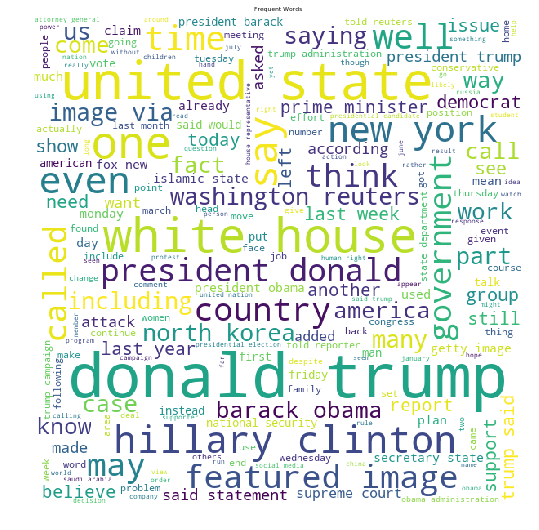

In [18]:
from wordcloud import WordCloud                  #Wordcloud for popularword
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=[9, 9])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=600).generate(" ".join(data['text']))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=6);

#  FEATURE EXTRACTION


# FOR UNDERSTANDING THE SEMANTICS FIRST WE NEED TO CONVERT THE GIVEN TEXT INTO VECTORS 

In [50]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

In [62]:
# download the model and return as object ready for use
model_glove_twitter = api.load("glove-twitter-25")

2020-12-23 12:50:03,626 : INFO : loading projection weights from /Users/abuzaid/gensim-data/glove-twitter-25/glove-twitter-25.gz
2020-12-23 12:51:14,789 : INFO : loaded (1193514, 25) matrix from /Users/abuzaid/gensim-data/glove-twitter-25/glove-twitter-25.gz


In [79]:
model_glove_twitter.wv.most_similar("goodluck",topn=10)


/Users/abuzaid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('luck', 0.8952937722206116),
 ('congrats', 0.8676329851150513),
 ('congratz', 0.8672979474067688),
 ('gudluck', 0.846071183681488),
 ('thankyou', 0.83946293592453),
 ('cheers', 0.8344191312789917),
 ('congratulation', 0.8191996216773987),
 ('thanks', 0.8181697130203247),
 ('btw', 0.8043405413627625),
 ('hows', 0.8017550706863403)]

In [82]:

model_glove_twitter.wv.most_similar("sunset",topn=10)



/Users/abuzaid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('sunrise', 0.9647405743598938),
 ('venice', 0.8808217644691467),
 ('beach', 0.8753870725631714),
 ('wonderland', 0.8615546226501465),
 ('island', 0.8578474521636963),
 ('rooftop', 0.8566927909851074),
 ('lake', 0.8532638549804688),
 ('hawaii', 0.850386381149292),
 ('autumn', 0.8491649627685547),
 ('garden', 0.8401645421981812)]

# Glove works only for words for phrases we need to use doc2vec

In [83]:
import gensim.models as g
import codecs


In [97]:
m = g.Doc2Vec.load('doc2vec.bin')


I1223 14:08:14.223704 4802803136 utils.py:422] loading Doc2Vec object from doc2vec.bin
I1223 14:08:14.390398 4802803136 doc2vec.py:1115] Model saved using code from earlier Gensim Version. Re-loading old model in a compatible way.
I1223 14:08:14.391715 4802803136 old_saveload.py:83] loading Doc2Vec object from doc2vec.bin
I1223 14:08:17.018070 4802803136 old_saveload.py:117] loading docvecs recursively from doc2vec.bin.docvecs.* with mmap=None
I1223 14:08:17.019056 4802803136 old_saveload.py:121] loading syn1neg from doc2vec.bin.syn1neg.npy with mmap=None
I1223 14:08:19.133796 4802803136 old_saveload.py:121] loading syn0 from doc2vec.bin.syn0.npy with mmap=None
I1223 14:08:21.943258 4802803136 old_saveload.py:152] setting ignored attribute syn0norm to None
I1223 14:08:21.973498 4802803136 old_saveload.py:152] setting ignored attribute cum_table to None
I1223 14:08:21.975383 4802803136 old_saveload.py:89] loaded doc2vec.bin
/Users/abuzaid/anaconda3/lib/python3.7/site-packages/gensim/mod

In [100]:
m.wv.vocab


{'tripolitan': <gensim.models.deprecated.keyedvectors.Vocab at 0x155b9f4e0>,
 'biennials': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91e898>,
 'biysk': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91e8d0>,
 'woodd': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91e908>,
 'woode': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91e940>,
 'pujyapada': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91e978>,
 'verplank': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91e9b0>,
 'luanco': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91e9e8>,
 'woodi': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91ea20>,
 'maderista': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91ea58>,
 'sowell': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91ea90>,
 'hexecontahedron': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91eac8>,
 'talk.origins': <gensim.models.deprecated.keyedvectors.Vocab at 0x18c91eb00>,
 'gag': <gensim.models.de

In [158]:
from gensim.test.utils import get_tmpfile
#from nltk import li
test_doc = word_tokenize("justice power long".lower())
test_doc_vector = m.infer_vector(test_doc)





m.most_similar(positive = [test_doc_vector])


/Users/abuzaid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


[('provisions/elements', 0.5334513187408447),
 ('3long', 0.5312995314598083),
 ('years/death', 0.5201660394668579),
 ('cycle/phenology', 0.5191822648048401),
 ('theacc.com', 0.5127573013305664),
 ('justice', 0.49668049812316895),
 ('power', 0.4811860918998718),
 ('0m/s', 0.47336843609809875),
 ('erythrocercid', 0.47189536690711975),
 ('inner-biblical', 0.46972963213920593)]

In [132]:
from scipy import spatial



fisrt_text = 'President of America'
second_text = 'How are you'

vec1 = m.infer_vector(fisrt_text.split())
vec2 = m.infer_vector(second_text.split())
similairty = spatial.distance.cosine(vec1, vec2)


In [133]:
similairty

0.4862775206565857

# Now using BERT to perform the same task as its more effitent on Sentences and preserving the long value

In [1]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

I1223 16:28:21.182958 4545906112 SentenceTransformer.py:38] Load pretrained SentenceTransformer: bert-base-nli-mean-tokens
I1223 16:28:21.184315 4545906112 SentenceTransformer.py:42] Did not find folder bert-base-nli-mean-tokens
I1223 16:28:21.185172 4545906112 SentenceTransformer.py:48] Try to download model from server: https://sbert.net/models/bert-base-nli-mean-tokens.zip
I1223 16:28:21.187689 4545906112 SentenceTransformer.py:99] Load SentenceTransformer from folder: /Users/abuzaid/.cache/torch/sentence_transformers/sbert.net_models_bert-base-nli-mean-tokens
I1223 16:28:26.627514 4545906112 SentenceTransformer.py:123] Use pytorch device: cpu


In [16]:
sentences = ["I ate dinner.", 
       "We had a three-course meal.", 
       "Brad came to dinner with us.",
       "He loves fish tacos.",
       "In the end, we all felt like we ate too much.",
       "We all agreed; it was a magnificent evening."]

sentence_embeddings = sbert_model.encode(sentences)

In [17]:
query = "I had pizza and pasta"
query_vec = sbert_model.encode([query])[0]

In [18]:
import numpy as np
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [19]:
for sent in sentences:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)


Sentence =  I ate dinner. ; similarity =  0.717346



Sentence =  We had a three-course meal. ; similarity =  0.6371339



Sentence =  Brad came to dinner with us. ; similarity =  0.5897907



Sentence =  He loves fish tacos. ; similarity =  0.6223935



Sentence =  In the end, we all felt like we ate too much. ; similarity =  0.41980496



Sentence =  We all agreed; it was a magnificent evening. ; similarity =  0.18081596


# Phrase-Based Matching 

In [56]:
# Scrapping wikipedia for AI articles
import bs4 as bs  
import urllib.request  
import re  
import nltk

scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')  
article = scrapped_data .read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:  
    article_text += p.text
    
    
processed_article = article_text.lower()  
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )  
processed_article = re.sub(r'\s+', ' ', processed_article)

In [57]:
# Creating parser

import spacy
nlp = spacy.load('en_core_web_sm')


from spacy.matcher import PhraseMatcher
phrase_matcher = PhraseMatcher(nlp.vocab)


In [58]:
# Parse List

phrases = ['machine learning', 'robots', 'intelligent agents']

patterns = [nlp(text) for text in phrases]

In [59]:
phrase_matcher.add('Ai', None, *patterns)


In [60]:
sentence = nlp (processed_article)

matched_phrases = phrase_matcher(sentence)

In [61]:
for match_id, start, end in matched_phrases:
    string_id = nlp.vocab.strings[match_id]  
    span = sentence[start:end]                   
    print(match_id, string_id, start, end, span.text)

2794387671973812638 Ai 28 30 intelligent agents
2794387671973812638 Ai 270 272 machine learning
2794387671973812638 Ai 1229 1231 machine learning
2794387671973812638 Ai 1545 1547 intelligent agents
2794387671973812638 Ai 3189 3191 intelligent agents
2794387671973812638 Ai 3348 3350 machine learning
2794387671973812638 Ai 3862 3863 robots
2794387671973812638 Ai 5313 5314 robots
2794387671973812638 Ai 5390 5391 robots
2794387671973812638 Ai 6499 6500 robots
2794387671973812638 Ai 6694 6695 robots
2794387671973812638 Ai 7555 7556 robots
2794387671973812638 Ai 8938 8939 robots
2794387671973812638 Ai 9059 9060 robots
2794387671973812638 Ai 9103 9104 robots
